In [1]:
import pandas as pd
import numpy as np
import sys
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, f1_score, silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import sklearn
import statsmodels
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import copy
import requests
import pprint
import xgboost
import scipy
import warnings
import re
import joblib
from datetime import datetime
from scipy import stats
# from urllib import parse
# from bs4 import BeautifulSoup

# 지수 형태의 실수를 소수점 3자리까지 표기
pd.options.display.float_format = "{:.3f}".format

# 공유 폴더 경로
dirShare = ".."

# 경고 출력 무시
warnings.filterwarnings("ignore")

In [5]:
# 라이브러리 버전 확인
print("Python 현재 버전 : " + sys.version)
print("pandas 현재 버전 : " + pd.__version__)
print("Numpy 현재 버전 : " + np.__version__)
print("scikit-learn 현재 버전 : " + sklearn.__version__)
print("scipy 현재 버전 : "+ scipy.__version__)
print("statsmodels 현재 버전 : " + statsmodels.__version__)
print("xgboost 현재 버전 : " + xgboost.__version__)

Python 현재 버전 : 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
pandas 현재 버전 : 2.0.3
Numpy 현재 버전 : 1.24.3
scikit-learn 현재 버전 : 1.3.0
scipy 현재 버전 : 1.11.1
statsmodels 현재 버전 : 0.14.0
xgboost 현재 버전 : 1.7.6


# 데이터 불러오고 전처리

## 기본전처리

In [2]:
# train.csv 데이터 프레임으로 불러오기
df = pd.read_csv(dirShare+"/data/train.csv")

# # df 정보 확인
# df.info()

# # df 상위 10개 불러오기
# df.head(10)

In [3]:
df_t = pd.read_csv(dirShare+"/data/test.csv")

# df_t.info()
# df_t.head()

In [4]:
# 데이터 개수 확인하기
print("train 데이터 개수 : ", df.shape[0])
print("test 데이터 개수 : ", df_t.shape[0])

# len(df)를 써도 동일

train 데이터 개수 :  301
test 데이터 개수 :  127


In [9]:
# 숫자 형식의 컬럼의 기술통계값을 출력, train.csv
df.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000,301.000,301.000,296.000,293.000,293.000,293.000,293.000,293.000,293.000,...,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.000,291.000,288.000
mean,219.056,81.040,20050125.801,145.709,12881747447.993,2014902794.594,10332439064.089,5654114566.904,269615124.573,511587022.570,...,222670.000,8146026488.788,3860583593.406,1510050431.986,4471247363.877,2709978815.423,5273919018.089,978627865.256,142.546,134.326
std,121.235,50.970,88938.154,118.924,20435433475.616,7460270656.568,14938862491.946,8083342530.256,802370115.514,1060379255.452,...,3811496.447,12557995349.365,6797242094.076,2953412250.368,7659580436.397,4564001070.999,10812593821.248,4688797890.975,160.191,151.062
min,1.000,1.000,19780124.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-20147802018.000,-2781506722.000,0.000,0.000
25%,112.000,37.000,20011017.000,52.750,3252111902.000,0.000,2758200772.000,1626052720.000,8217133.000,80133952.000,...,0.000,1283220350.000,285574118.000,0.000,25578782.000,0.000,1017572570.000,0.000,53.500,53.750
50%,230.000,75.000,20071126.000,136.500,5524218104.000,210410492.000,4684074465.000,2659892367.000,43637641.000,183196506.000,...,0.000,3784552900.000,1454049945.000,85425488.000,1969746813.000,1100000000.000,2894969804.000,0.000,80.000,79.000
75%,321.000,123.000,20111021.000,193.000,12748392940.000,910527771.000,10778762060.000,6363400069.000,205033071.000,420333030.000,...,0.000,8465053127.000,4364713622.000,1567966980.000,4905441439.000,3360000000.000,5370284792.000,101444685.000,181.500,170.000
max,428.000,178.000,20170607.000,656.000,151000000000.000,98503322990.000,103000000000.000,64035593950.000,9144170639.000,8686379500.000,...,65242310.000,85088583901.000,68468775764.000,17593752360.000,51503883627.000,32561472110.000,125000000000.000,68527297093.000,1200.000,1200.000


In [10]:
# 숫자 형식의 컬럼의 기술통계값을 출력, test.csv
df_t.describe()

,inst_id,OC,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,...,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2
count,127.000,0.000,127.000,126.000,119.000,125.000,125.000,125.000,125.000,125.000,...,125.000,125.000,125.000,125.000,125.000,125.000,125.000,125.000,125.000,125.000
mean,205.906,NaN,95.858,20050851.333,172.790,18244463620.632,3973320516.568,13404099537.944,7415083961.448,517551263.832,...,13362088426.024,351383068.584,19731.144,11898512213.344,5633432084.136,2181713388.144,6495025895.904,4482682424.408,6116178748.752,1648473877.648
std,131.802,NaN,52.684,87958.149,126.024,31335295156.854,14199483023.803,20544811391.822,12100434017.387,1193138608.474,...,20854039250.721,979109688.084,220600.896,19711820111.028,9662047510.141,4952448637.736,12036733189.767,7517020054.736,9813461143.417,4779443752.861
min,2.000,NaN,6.000,19760409.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-2955957091.000,-8600000000.000
25%,89.000,NaN,51.000,20000826.000,94.000,3235888530.000,0.000,3083860292.000,1666742310.000,16410940.000,...,2807762809.000,0.000,0.000,1679896491.000,391415567.000,0.000,132136760.000,0.000,949265633.000,0.000
50%,199.000,NaN,95.000,20071066.000,156.000,6637115540.000,189692304.000,5716501623.000,3263054070.000,53191709.000,...,5450482767.000,33173766.000,0.000,4494217146.000,1554505639.000,300000000.000,2030000000.000,1750000000.000,2427138957.000,0.000
75%,328.000,NaN,144.500,20117895.500,213.000,17040391156.000,1192329214.000,14452425786.000,7198103374.000,371459225.000,...,11871143997.000,204899800.000,0.000,14120305387.000,6586241453.000,2650000000.000,5700000000.000,4857047850.000,5881964991.000,693516549.000
max,431.000,NaN,177.000,20170531.000,771.000,181000000000.000,116000000000.000,127000000000.000,82395611833.000,7302719335.000,...,113000000000.000,7112779552.000,2466393.000,131000000000.000,52414267533.000,37143344381.000,78556538604.000,36202877976.000,49244922328.000,25617866194.000


In [11]:
# 컬럼별 null 값 확인하기, train.csv
df.shape[0] - df.count()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [12]:
# 컬럼별 null 값 확인하기, test.csv
df_t.shape[0] - df_t.count()

inst_id                 0
OC                    127
sido                    0
sgg                     0
openDate                1
bedCount                8
instkind                2
revenue1                2
salescost1              2
sga1                    2
salary1                 2
noi1                    2
noe1                    2
interest1               2
ctax1                   2
profit1                 2
liquidAsset1            2
quickAsset1             2
receivableS1            2
inventoryAsset1         2
nonCAsset1              2
tanAsset1               2
OnonCAsset1             2
receivableL1            2
debt1                   2
liquidLiabilities1      2
shortLoan1              2
NCLiabilities1          2
longLoan1               2
netAsset1               2
surplus1                2
revenue2                2
salescost2              2
sga2                    2
salary2                 2
noi2                    2
noe2                    2
interest2               2
ctax2       

In [5]:
# employee 컬럼이 object 타입이고, 숫자에 ','이 포함돼 있어 정규 표현식으로 없앰
for i in range(2) : 
    df_t["employee"+str(i+1)] = df_t["employee"+str(i+1)].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))

df_t[["employee1", "employee2"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   employee1  127 non-null    object
 1   employee2  127 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [6]:
# 실수 타입으로 변경
df_t["employee1"].replace("", np.NaN, inplace=True)
df_t["employee2"].replace("", np.NaN, inplace=True)
df_t[["employee1", "employee2"]] = df_t[["employee1", "employee2"]].astype("float64")
df_t[["employee1", "employee2"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   employee1  119 non-null    float64
 1   employee2  112 non-null    float64
dtypes: float64(2)
memory usage: 2.1 KB


In [15]:
# 개/폐업 수 확인
df["OC"].value_counts()

OC
open      286
 close     15
Name: count, dtype: int64

In [7]:
# train과 test를 일시적으로 합침
df_merge = pd.concat(objs=[df,df_t], axis=0)
print("합친 데이터 수 : ",len(df_merge))
df_merge.head()

합친 데이터 수 :  428


,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228.000,175.000,nursing_hospital,4217530010.000,0.000,3961134739.000,...,758993742.000,222876855.000,0.000,536116887.000,390000000.000,2619290493.000,1271224493.000,62.000,64.000,same
1,3,open,gyeongnam,32,19970401.000,410.000,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.000,813.000,same
2,4,open,gyeonggi,89,20161228.000,468.000,nursing_hospital,1004521989.000,515483669.000,447219722.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,234.000,1.000,same
3,7,open,incheon,141,20000814.000,353.000,general_hospital,72507342181.000,0.000,70677397660.000,...,37755010512.000,17018596586.000,9219427379.000,20736413926.000,15100000000.000,12954271998.000,7740829037.000,663.000,663.000,same
4,9,open,gyeongnam,32,20050901.000,196.000,general_hospital,49043538016.000,0.000,47656051197.000,...,51432592890.000,30072585842.000,17593752360.000,21360007048.000,14108027465.000,5561941.000,9025549604.000,206.000,197.000,same


In [8]:
# 아직 운영 중인 병원을 1로 변환
df_merge.replace({"open":1},inplace=True)
# 폐업한 병원을 0으로 변환
df_merge.replace({" close":0}, inplace=True)
# unique() 메서드를 통해 "OC" 컬럼의 데이터를 확인
# df["OC"].unique()
df_merge.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1.000,choongnam,73,20071228.000,175.000,nursing_hospital,4217530010.000,0.000,3961134739.000,...,758993742.000,222876855.000,0.000,536116887.000,390000000.000,2619290493.000,1271224493.000,62.000,64.000,same
1,3,1.000,gyeongnam,32,19970401.000,410.000,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.000,813.000,same
2,4,1.000,gyeonggi,89,20161228.000,468.000,nursing_hospital,1004521989.000,515483669.000,447219722.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,234.000,1.000,same
3,7,1.000,incheon,141,20000814.000,353.000,general_hospital,72507342181.000,0.000,70677397660.000,...,37755010512.000,17018596586.000,9219427379.000,20736413926.000,15100000000.000,12954271998.000,7740829037.000,663.000,663.000,same
4,9,1.000,gyeongnam,32,20050901.000,196.000,general_hospital,49043538016.000,0.000,47656051197.000,...,51432592890.000,30072585842.000,17593752360.000,21360007048.000,14108027465.000,5561941.000,9025549604.000,206.000,197.000,same


In [9]:
# 오너 변환 여부
df_merge["ownerChange"].replace({"same":0},inplace=True)
df_merge["ownerChange"].replace({"change":1},inplace=True)
# df["ownerChange"].unique()
df_merge.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1.000,choongnam,73,20071228.000,175.000,nursing_hospital,4217530010.000,0.000,3961134739.000,...,758993742.000,222876855.000,0.000,536116887.000,390000000.000,2619290493.000,1271224493.000,62.000,64.000,0.000
1,3,1.000,gyeongnam,32,19970401.000,410.000,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.000,813.000,0.000
2,4,1.000,gyeonggi,89,20161228.000,468.000,nursing_hospital,1004521989.000,515483669.000,447219722.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,234.000,1.000,0.000
3,7,1.000,incheon,141,20000814.000,353.000,general_hospital,72507342181.000,0.000,70677397660.000,...,37755010512.000,17018596586.000,9219427379.000,20736413926.000,15100000000.000,12954271998.000,7740829037.000,663.000,663.000,0.000
4,9,1.000,gyeongnam,32,20050901.000,196.000,general_hospital,49043538016.000,0.000,47656051197.000,...,51432592890.000,30072585842.000,17593752360.000,21360007048.000,14108027465.000,5561941.000,9025549604.000,206.000,197.000,0.000


In [19]:
df_merge["instkind"].unique()

array(['nursing_hospital', 'general_hospital', 'hospital',
       'traditional_clinic', 'clinic', 'traditional_hospital',
       'dental_clinic', nan], dtype=object)

In [10]:
# 개업한 날짜는 변수로서 의미가 없음. 모델은 날짜를 인식하지 못하기 때문에
# 개업 날짜와 폐업 날짜의 차이로 변수를 조정할 필요가 있음

date_of_2018 = "2018-01-01"

# 문자 타입을 date 타입으로

# df["openDate"] = df["openDate"].apply(lambda x : datetime.strptime(str(x), "%Y%m%d")) # ValueError: unconverted data remains: .0
df_merge["openDate"] = pd.to_datetime(df_merge["openDate"], format="%Y%m%d")

# 날짜 차이를 새로운 컬럼으로 생성, 데이터 프레임 중간에 삽입
df_merge.insert(2, "dif_date", datetime.strptime(date_of_2018,"%Y-%m-%d")-df_merge["openDate"])
df_merge["dif_date"] = df_merge["dif_date"].dt.days

df_merge.drop(labels="openDate", axis=1, inplace=True)

df_merge["dif_date"].tail()
df_merge.head()

,inst_id,OC,dif_date,sido,sgg,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1.000,3657.000,choongnam,73,175.000,nursing_hospital,4217530010.000,0.000,3961134739.000,...,758993742.000,222876855.000,0.000,536116887.000,390000000.000,2619290493.000,1271224493.000,62.000,64.000,0.000
1,3,1.000,7580.000,gyeongnam,32,410.000,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.000,813.000,0.000
2,4,1.000,369.000,gyeonggi,89,468.000,nursing_hospital,1004521989.000,515483669.000,447219722.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,234.000,1.000,0.000
3,7,1.000,6349.000,incheon,141,353.000,general_hospital,72507342181.000,0.000,70677397660.000,...,37755010512.000,17018596586.000,9219427379.000,20736413926.000,15100000000.000,12954271998.000,7740829037.000,663.000,663.000,0.000
4,9,1.000,4505.000,gyeongnam,32,196.000,general_hospital,49043538016.000,0.000,47656051197.000,...,51432592890.000,30072585842.000,17593752360.000,21360007048.000,14108027465.000,5561941.000,9025549604.000,206.000,197.000,0.000


In [11]:
# 병원의 종류를, get_dummies를 이용해 one-hot-encoding
df_one = pd.get_dummies(df_merge, columns=["instkind"], prefix=["instkind"], prefix_sep="_", dtype=int)
df_one.head()

,inst_id,OC,dif_date,sido,sgg,bedCount,revenue1,salescost1,sga1,salary1,...,employee1,employee2,ownerChange,instkind_clinic,instkind_dental_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital
0,1,1.000,3657.000,choongnam,73,175.000,4217530010.000,0.000,3961134739.000,2033835290.000,...,62.000,64.000,0.000,0,0,0,0,1,0,0
1,3,1.000,7580.000,gyeongnam,32,410.000,NaN,NaN,NaN,NaN,...,801.000,813.000,0.000,0,0,1,0,0,0,0
2,4,1.000,369.000,gyeonggi,89,468.000,1004521989.000,515483669.000,447219722.000,296402310.000,...,234.000,1.000,0.000,0,0,0,0,1,0,0
3,7,1.000,6349.000,incheon,141,353.000,72507342181.000,0.000,70677397660.000,31786048663.000,...,663.000,663.000,0.000,0,0,1,0,0,0,0
4,9,1.000,4505.000,gyeongnam,32,196.000,49043538016.000,0.000,47656051197.000,24460782270.000,...,206.000,197.000,0.000,0,0,1,0,0,0,0


In [12]:
# 영어로 돼 있는 '시도'를 한글로 변환

df_one["sido"].replace(['choongnam', 'gyeongnam', 'gyeonggi', 'incheon', 'busan',
       'jeonnam', 'seoul', 'jeonbuk', 'choongbuk', 'ulsan', 'daejeon',
       'daegu', 'gyeongbuk', 'gangwon', 'gwangju', 'sejong', 'jeju'], 
       ["충청남도", "경상남도", "경기도", "인천광역시", '부산광역시', '전라남도', '서울특별시', 
        '전라북도', '충청북도', '울산광역시', '대전광역시', '대구광역시', "경상북도", "강원도", "광주광역시", "세종특별자치시", '제주특별자치도'],inplace=True)

print("df_one의 시도 : ",df_one["sido"].unique())
df_one.head()

df_one의 시도 :  ['충청남도' '경상남도' '경기도' '인천광역시' '부산광역시' '전라남도' '서울특별시' '전라북도' '충청북도' '울산광역시'
 '대전광역시' '대구광역시' '경상북도' '강원도' '광주광역시' '세종특별자치시' '제주특별자치도']


,inst_id,OC,dif_date,sido,sgg,bedCount,revenue1,salescost1,sga1,salary1,...,employee1,employee2,ownerChange,instkind_clinic,instkind_dental_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital
0,1,1.000,3657.000,충청남도,73,175.000,4217530010.000,0.000,3961134739.000,2033835290.000,...,62.000,64.000,0.000,0,0,0,0,1,0,0
1,3,1.000,7580.000,경상남도,32,410.000,NaN,NaN,NaN,NaN,...,801.000,813.000,0.000,0,0,1,0,0,0,0
2,4,1.000,369.000,경기도,89,468.000,1004521989.000,515483669.000,447219722.000,296402310.000,...,234.000,1.000,0.000,0,0,0,0,1,0,0
3,7,1.000,6349.000,인천광역시,141,353.000,72507342181.000,0.000,70677397660.000,31786048663.000,...,663.000,663.000,0.000,0,0,1,0,0,0,0
4,9,1.000,4505.000,경상남도,32,196.000,49043538016.000,0.000,47656051197.000,24460782270.000,...,206.000,197.000,0.000,0,0,1,0,0,0,0


In [13]:
# 시도 데이터를 one-hot-encoding하는 함수
def sido_ohe(DF, colname : str) : 
    DF = pd.get_dummies(DF, columns=[colname], prefix=[colname], prefix_sep="_", dtype=int)
    return DF

In [14]:
# 시도 데이터를 one-hot-encoding
df_m = sido_ohe(DF=df_one, colname="sido")
# df_m.head(10)

In [15]:
df_m.drop("sgg",axis=1,inplace=True)
# df_m.info()

In [16]:
def arrange_tt(ldata, rdata, rcol : str) :
    """ merge 메서드를 사용하면 on 조건을 정렬 기준으로 삼음
    merge 이후 train 데이터와 test 데이터가 섞여 있으므로 다시 분리한 후 합쳐주는 작업 진행"""

    df_dvd_test = pd.merge(left=ldata, right=rdata[rcol], how="inner", on=rcol)
    # inst_id를 기준으로 오름차순 정렬
    df_dvd_test.sort_values(by=rcol, axis=0, ascending=True, inplace=True)

    df_dvd_train = pd.merge(left=ldata, right=rdata[rcol], how="outer", on=rcol, indicator=True)
    # inst_id를 기준으로 오름차순 정렬
    df_dvd_train.sort_values(by=rcol, axis=0, ascending=True, inplace=True)

    # test 데이터의 inst_id가 다른 데이터만 추출 >> train 데이터
    # indicator=True는 merge된 각 행의 정보를 알려줌
    # left에만 존재하는 행이라면 left_only
    # right에만 존재하는 행이라면 right_only
    # 둘 다 존재하면 both
    df_dvd_train = df_dvd_train[df_dvd_train["_merge"]=="left_only"].iloc[:,:df_dvd_train.shape[1]-1]

    DF = pd.concat([df_dvd_train, df_dvd_test], axis=0)

    return DF

In [17]:
df_m = arrange_tt(ldata=df_m, rdata=df_t, rcol="inst_id")
df_m.iloc[301:310, :]

,inst_id,OC,dif_date,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,sido_부산광역시,sido_서울특별시,sido_세종특별자치시,sido_울산광역시,sido_인천광역시,sido_전라남도,sido_전라북도,sido_제주특별자치도,sido_충청남도,sido_충청북도
0,2,NaN,6977.000,300.000,66824864410.000,0.000,65657092101.000,32236953402.000,4314093449.000,4901516562.000,...,0,0,0,0,1,0,0,0,0,0
1,5,NaN,663.000,44.000,34957575568.000,0.000,32592697196.000,16722544253.000,68710235.000,1981032861.000,...,0,0,0,0,0,0,0,1,0,0
2,6,NaN,10476.000,276.000,23260305967.000,2542570943.000,23087485220.000,11687337552.000,1601942757.000,1380941439.000,...,0,0,0,0,0,1,0,0,0,0
3,8,NaN,2866.000,363.000,0.000,0.000,0.000,0.000,4850652289.000,2060988817.000,...,1,0,0,0,0,0,0,0,0,0
4,10,NaN,4959.000,213.000,50370249897.000,0.000,48558027276.000,22963463015.000,1534452040.000,0.000,...,0,0,0,0,0,0,1,0,0,0
5,12,NaN,3295.000,220.000,43816543122.000,10051312608.000,29264928639.000,19715446217.000,3260366823.000,4892588017.000,...,0,0,0,0,0,0,0,0,0,0
6,13,NaN,5712.000,370.000,86227731973.000,21961377249.000,61519717053.000,39714189795.000,557312990.000,1248942580.000,...,0,0,0,0,0,0,0,0,0,0
7,20,NaN,4009.000,246.000,35709731765.000,4188686629.000,30001785786.000,18255735890.000,372357781.000,677858348.000,...,0,0,0,0,0,0,1,0,0,0
8,21,NaN,754.000,148.000,2719142464.000,0.000,2067186286.000,900922930.000,177541556.000,116742065.000,...,0,0,0,0,0,0,0,0,0,0


# 데이터 분석 및 모델 학습

## 분석 1. 결측치 안 채우고 모델 학습

In [ ]:
# # scaling 전 독립 변수들의 데이터 분포를 살펴봄
# plt.figure(figsize=(16,10))

# sns.boxplot(data=df_m.iloc[:, 2:10])

# # 이상치가 많음

In [ ]:
# # Q-Q plot

# import statsmodels.api as sm

# plt.figure(figsize=(10,5))    # 그래프 사이즈 지정
# sm.qqplot(data=df_m.iloc[:,22], dist=stats.norm, line='q')
# plt.show()

In [ ]:
def show_qq(DF, colList : list) :
    """
    각 컬럼별 Q-Q plot을 확인합니다.
    DF : 정규성을 확인하고자 하는 data를 입력합니다. pandas의 DataFrame 형태입니다.
    colList : 정규성을 확인하고자 하는 data의 컬럼명 리스트입니다.
    """
    import math
    fig, axs = plt.subplots(figsize=(16, 32), nrows=int(math.ceil(len(colList)/3)), ncols=3)
    # axs는 numpy ndarray 형식

    # 한글 폰트 설정 및 깨짐 방지
    plt.rcParams['font.family'] = 'Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] = False
    
    for c in range(int(len(colList))):
        sm.qqplot(data=DF[colList[c]], dist=stats.norm, line='q', ax=axs[(c//3),(c % 3)])
        axs[(c//3),(c % 3)].set_title("Name of Column :"+ colList[c])

    plt.show()

    return

In [ ]:
# 일부 컬럼의 정규성 확인
# show_qq(DF=df_m, colList=df_m.columns.to_list()[10:22])

In [70]:
scaler1 = MinMaxScaler()

scaler1.fit(df_m.iloc[:,2:])

X = scaler1.transform(df_m.iloc[:,2:])

X.shape

(428, 77)

처음에 train.csv와 test.csv로 나눠져 있었기 때문에 처음 그대로 나눠야 합니다!⌨️

In [71]:
train_X = X[:301]
test_X = X[301:]
train_y = df_m.iloc[:301,1]
test_y = df_m.iloc[301:,1]

print("train 독립변수 크기 : ", train_X.shape)
print("test 독립변수 크기 : ", test_X.shape)
print("train 종속변수 크기 : ", train_y.shape)
print("test 종속변수 크기 : ", test_y.shape)

train 독립변수 크기 :  (301, 77)
test 독립변수 크기 :  (127, 77)
train 종속변수 크기 :  (301,)
test 종속변수 크기 :  (127,)


In [72]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_X, train_y, test_size=0.2,random_state=50, stratify=train_y)

In [73]:
model_xgb_1 = XGBClassifier()
xgb_model_1 = model_xgb_1.fit(X_train1, y_train1)

y_pred_1 = xgb_model_1.predict(X_test1)
print("정확도 : ",round(accuracy_score(y_test1, y_pred_1),3))
print("f1 socre : ",round(f1_score(y_test1, y_pred_1),3))

정확도 :  0.951
f1 socre :  0.975


정확도 :  0.951  
f1 socre :  0.975

## 분석 2. 차원 축소 후 모델 학습(vif >= 10 이상 제외)

### statsmodels를 사용한 vif 계산

In [74]:
# 병원 개/폐업 정보의 다중 회귀 분석과 검정 통계량 확인
Models1 = sm.ols("OC ~ " + "+".join(df_m.columns[2:]), data=df_m.iloc[:,1:])
result1 = Models1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                     OC   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1.899
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           0.000248
Time:                        16:11:42   Log-Likelihood:                 190.95
No. Observations:                 277   AIC:                            -235.9
Df Residuals:                     204   BIC:                             28.66
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [75]:
# vif를 계산해주는 메서드는 결측치를 계산해주지 않음음
df_m_drop = df_m.dropna(axis=0, how="any")
df_m_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 296
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        277 non-null    int64  
 1   OC                             277 non-null    float64
 2   dif_date                       277 non-null    float64
 3   bedCount                       277 non-null    float64
 4   revenue1                       277 non-null    float64
 5   salescost1                     277 non-null    float64
 6   sga1                           277 non-null    float64
 7   salary1                        277 non-null    float64
 8   noi1                           277 non-null    float64
 9   noe1                           277 non-null    float64
 10  interest1                      277 non-null    float64
 11  ctax1                          277 non-null    float64
 12  profit1                        277 non-null    float64


In [76]:
# 독립변수만 분리
X_dr = df_m_drop.iloc[:,2:]

In [77]:
# 독립변수들간 다중 공선성 확인, vif 지수 10 이상이면 변수 제거 고려
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_dr.values,i) for i in range(X_dr.shape[1])]
vif["features"] = X_dr.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.537,ownerChange
1,2.126,dif_date
2,3.340,bedCount
3,6.736,receivableS2
4,7.251,receivableS1
...,...,...
72,inf,sido_강원도
73,inf,instkind_traditional_hospital
74,NaN,receivableL1
75,NaN,receivableL2


In [82]:
# vif 지수가 10미만인 컬럼명
vif[vif["VIF Factor"]<10.0]["features"]

0     ownerChange
1        dif_date
2        bedCount
3    receivableS2
4    receivableS1
Name: features, dtype: object

In [78]:
feat_vif = vif[vif["VIF Factor"]<10.0]["features"]

fvList = [feat_vif[f] for f in range(len(feat_vif))]

In [79]:
numList = []
for f in fvList : 
    idx = df_m.columns.to_list().index(f)
    numList.append(idx)

print("차원 축소된 컬럼의 인덱스 : ", numList)

차원 축소된 컬럼의 인덱스 :  [54, 2, 3, 39, 15]


In [80]:
train_X_vif = train_X[:,numList]
test_X_vif = test_X[:,numList]

print("차원 축소된 train 독립변수 크기 : ", train_X_vif.shape)
print("차원 축소된 test 독립변수 크기 : ", test_X_vif.shape)

차원 축소된 train 독립변수 크기 :  (301, 5)
차원 축소된 test 독립변수 크기 :  (127, 5)


In [81]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_X_vif, train_y, test_size=0.2,random_state=50, stratify=train_y)

model_xgb_2 = XGBClassifier()
xgb_model_2 = model_xgb_2.fit(X_train2, y_train2)

y_pred_2 = xgb_model_2.predict(X_test2)
print("정확도 : ",round(accuracy_score(y_test2, y_pred_2),3))
print("f1 socre : ",round(f1_score(y_test2, y_pred_2),3))

정확도 :  0.967
f1 socre :  0.983


정확도 :  0.967  
f1 socre :  0.983

In [83]:
y_pred_2_5 = xgb_model_2.predict(X_train2)
print("정확도 : ",round(accuracy_score(y_train2, y_pred_2_5),3))
print("f1 socre : ",round(f1_score(y_train2, y_pred_2_5),3))

정확도 :  0.983
f1 socre :  0.991


차원 축소에서 선택된 컬럼이 대표성을 지니지 않음😱
- 단기 미수금

## 분석 3. 결측치를 채운 후 모델 학습

### 인구 데이터 합치기

In [18]:
# 2017년 지역별 인구수 데이터
# https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3
pop = pd.read_csv(dirShare+"/data/행정구역_시군구_별__성별_인구수_20230718231833.csv", header=1, encoding="cp949")
# pop.info()
# pop.head()

In [19]:
# 컬럼명을 영어로 바꾸기
pop.rename(columns={"총인구수 (명)":"tt_pop", "남자인구수 (명)":"male_pop", "여자인구수 (명)":"female_pop"}, inplace=True)
# pop.columns

In [20]:
# df_one와 pop(인구수) join
df_new = pd.merge(df_one, pop, how="inner", left_on="sido", right_on="행정구역(시군구)별")
# df_new.head()

In [21]:
# 시도를 one-hot-encoding
df_new = sido_ohe(DF=df_new,colname="sido")
# df_new.columns

In [22]:
# 지역을 one-hot-encoding 했으므로 시군구 컬럼은 무의미
df_new.drop(columns=["sgg","행정구역(시군구)별"], axis=1, inplace=True)
# df_new.info()

### kmeans를 통한 병원 세그먼트 군집

In [23]:
def visualize_silhouette(cluster_lists, X_features): 

    """
    함수 출처 : https://dev-ryuon.tistory.com/83
    """

    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=100)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
sns.boxplot(data=df_new.iloc[:, 2:10])

In [24]:
# NaN 값이 없는 컬럼만 남기고, 지역 데이터 없애기
df_kmeans = df_new.dropna(axis=1, how="any")
# df_kmeans.info()

In [25]:
scaler_cl = MinMaxScaler()

df_mmsc = df_kmeans.drop(columns=["inst_id"])

df_mmsc.dropna(how="any", axis=1, inplace=True)

# df_mmsc.info()

In [26]:
scalerX_cl = scaler_cl.fit(df_mmsc)

X_mmsc_cl = scaler_cl.transform(df_mmsc)

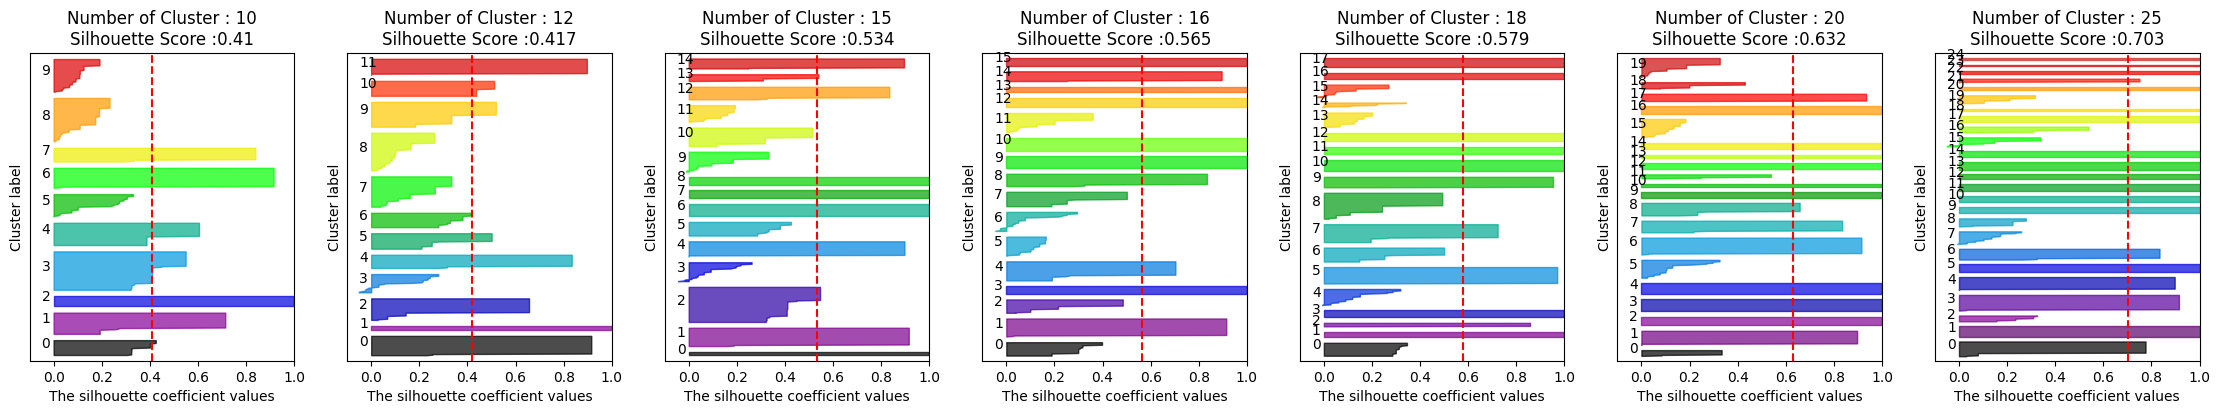

In [27]:
visualize_silhouette([10,12,15,16,18,20,25], X_mmsc_cl)
# 25개가 됐을 때 실루엣 계수가 0.703으로 최대

In [28]:
clst_kmeans = KMeans(n_clusters=25, random_state=100, max_iter=500)

model = clst_kmeans.fit(X_mmsc_cl)
clst_label = model.labels_

print(clst_label)

[ 6  6  7 19  6  6  6  6  6 19  6  6  6  6  6  6  6  6  6  6  6  6 19  6
  7  6  6  6  6  6  7  7  7  7  1  1 11  7 11 11  1  1  1 11  1  1  1 11
 11  1  1  1  7  1  1  1  1  1 11  1 11  1  1 11  1 11 11 11  1 11 11  1
  1 11  1 11  0 14 14 14  0  0  0  9  9 18  9  9  0  0  9 18  0  9  0  0
  0 18  0  0  0  0  9  0  0  9 14 14 18 14  9  0  9  0 18  0  0  0  9 14
 14 14  9  0  0 14 14  9  0 14  0  0  0 14  0  0  0 18  0  9  0  0  0  9
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  7  4  4  4  4  4  4  4  4  4
  4  4  7 22  4  4  4 22  4  4  4 22  4  4  4 22  7  7  7 22  4 22  4 22
  4  4  4  4 22  4  4  4  4 10 10 10 16 16 16 16 10 10 10 16 10 10 16 10
 10 10 10 16 16 10 16 16 10 16 10 16 16 16  8  8  8 20  8  8 20 20  8  8
  8 20  8  8 20  8  8 20  8 20  8  8  8 20  8  8  8  5  5  5 21  5  5  7
  5  5  5 21  5 21 21  5 21  5  7  7  7  5 21 21  5  5 21 21  5  5  5  5
 17 24 17 17 24 17 24 17 17 17 17 17 17 24  7 17 24 17 17 17 24  7  7 15
 19 15 19 19  7 15 15 15 19 19 15 15 15 19 15 15 15

In [29]:
df_kmeans["NumberOfCluster"] = pd.Series(clst_label)
# df_kmeans.tail()

In [30]:
# 재무 정보가 포함돼 있는 데이터 프레임에 클러스터링 넘버 삽입
df_join_clst = pd.merge(df_new, df_kmeans[["inst_id", "NumberOfCluster"]], how="inner", on="inst_id")
# df_join_clst.info()

In [38]:
df_join_clst.shape[0] - df_join_clst.count()

inst_id              0
OC                 127
dif_date             1
bedCount            13
revenue1            10
                  ... 
sido_전라북도            0
sido_제주특별자치도         0
sido_충청남도            0
sido_충청북도            0
NumberOfCluster      0
Length: 83, dtype: int64

In [ ]:
# 군집별 히스토그램 확인

def sp_hist(DF=None, colClst=None, colhist=None, Range=None) :
    """
    군집별 특정 컬럼의 히스토그램을 확인합니다.

    DF : 히스토그램을 확인하고자 하는 데이터프레임
    colClst : 군집 번호를 표시하는 컬럼
    colhist : 히스토그램으로 표현하고자 하는 컬럼
    """
    
    fig, axs = plt.subplots(figsize=(16, 32), nrows=4, ncols=3)
    # axs는 numpy ndarray 형식

    # 한글 폰트 설정 및 깨짐 방지
    plt.rcParams['font.family'] = 'Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] = False
    
    for c in range(Range):
        dataframe = DF[DF[colClst]==c][colhist]
        # print("현재 순서 :",c)
        # print("행 :", c//3)
        # print("열 :", c%3)
        axs[(c//3),(c % 3)].hist(dataframe, bins=20)
        axs[(c//3),(c % 3)].set_title('Number of Cluster : '+ str(c)+'\n' \
                            'Column Name :' + str(dataframe.name) )
        axs[(c//3),(c % 3)].set_xlabel("계급")
        axs[(c//3),(c % 3)].set_ylabel("도수")

    plt.show()

    return

In [ ]:
# 군집별 boxplot 확인
def sp_boxplot(DF=None, colClst=None, colbox=None, Range=None) :
    plt.figure(figsize=(28,20))
    plt.rcParams['font.family'] = 'Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] = False

    # rectangular box plot
    DF_box = pd.DataFrame()

    for c in range(Range) : 
        dataframe = DF[DF[colClst]==c][colbox]
        dataframe.rename(str(c), inplace=True)
        DF_box = pd.concat([DF_box, dataframe], axis=1)

    sns.boxplot(
                data = DF_box,
                orient='v'
                ) 
    plt.title("클러스터 별 boxplot")

    plt.show()
    return

In [ ]:
# sp_boxplot(DF=df_join_clst, colClst="NumberOfCluster", colbox="surplus1", Range=25)

In [31]:
# 군집별 중앙값으로 결측치 채움

def fill_median(DF=None, colClst=None, colFill=None, numclst=None) :
    """
    결측치가 있는 행 데이터에, 군집별 중앙값을 채워 넣고자 함

    DF : 히스토그램을 확인하고자 하는 데이터프레임
    colClst : 군집 번호를 표시하는 컬럼(str)
    colFill : 결측치를 채우고자 하는 컬럼 리스트(list)
    numclst : 클러스터 개수(int)
    """
    for cl in range(numclst) :
        for L in colFill :
            median_value = DF.loc[DF[colClst] == cl, L].median()
            DF.loc[(DF[colClst] == cl) & DF[L].isnull(), L] = median_value

    return DF

In [32]:
df_join_clst = fill_median(DF=df_join_clst, colClst="NumberOfCluster", 
                           colFill=df_join_clst.columns[2:82], numclst=25)

df_join_clst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        428 non-null    int64  
 1   OC                             301 non-null    float64
 2   dif_date                       428 non-null    float64
 3   bedCount                       428 non-null    float64
 4   revenue1                       428 non-null    float64
 5   salescost1                     428 non-null    float64
 6   sga1                           428 non-null    float64
 7   salary1                        428 non-null    float64
 8   noi1                           428 non-null    float64
 9   noe1                           428 non-null    float64
 10  interest1                      428 non-null    float64
 11  ctax1                          428 non-null    float64
 12  profit1                        428 non-null    flo

In [33]:
df_join_clst = arrange_tt(df_join_clst, df_t, "inst_id")
df_join_clst.iloc[301:310,:]

,inst_id,OC,dif_date,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,sido_서울특별시,sido_세종특별자치시,sido_울산광역시,sido_인천광역시,sido_전라남도,sido_전라북도,sido_제주특별자치도,sido_충청남도,sido_충청북도,NumberOfCluster
37,2,NaN,6977.000,300.000,66824864410.000,0.000,65657092101.000,32236953402.000,4314093449.000,4901516562.000,...,0,0,0,1,0,0,0,0,0,2
124,5,NaN,663.000,44.000,34957575568.000,0.000,32592697196.000,16722544253.000,68710235.000,1981032861.000,...,0,0,0,0,0,0,1,0,0,19
58,6,NaN,10476.000,276.000,23260305967.000,2542570943.000,23087485220.000,11687337552.000,1601942757.000,1380941439.000,...,0,0,0,0,1,0,0,0,0,16
41,8,NaN,2866.000,363.000,0.000,0.000,0.000,0.000,4850652289.000,2060988817.000,...,0,0,0,0,0,0,0,0,0,7
74,10,NaN,4959.000,213.000,50370249897.000,0.000,48558027276.000,22963463015.000,1534452040.000,0.000,...,0,0,0,0,0,1,0,0,0,7
18,12,NaN,3295.000,220.000,43816543122.000,10051312608.000,29264928639.000,19715446217.000,3260366823.000,4892588017.000,...,0,0,0,0,0,0,0,0,0,14
19,13,NaN,5712.000,370.000,86227731973.000,21961377249.000,61519717053.000,39714189795.000,557312990.000,1248942580.000,...,0,0,0,0,0,0,0,0,0,14
75,20,NaN,4009.000,246.000,35709731765.000,4188686629.000,30001785786.000,18255735890.000,372357781.000,677858348.000,...,0,0,0,0,0,1,0,0,0,7
104,21,NaN,754.000,148.000,2719142464.000,0.000,2067186286.000,900922930.000,177541556.000,116742065.000,...,0,0,0,0,0,0,0,0,0,3


### 모델 학습

In [34]:
scaler3 = MinMaxScaler()

scaler3.fit(df_join_clst.iloc[:,2:82])

X3 = scaler3.transform(df_join_clst.iloc[:,2:82])

X3.shape

(428, 80)

In [35]:
train_X3 = X3[:301]
test_X3 = X3[301:]
train_y3 = df_join_clst.iloc[:301,1]
test_y3 = df_join_clst.iloc[301:,1]

print("결측치를 채운 train 독립변수 크기 : ", train_X3.shape)
print("결측치를 채운 test 독립변수 크기 : ", test_X3.shape)
print("결측치를 채운 train 종속변수 크기 : ", train_y3.shape)
print("결측치를 채운 test 종속변수 크기 : ", test_y3.shape)

결측치를 채운 train 독립변수 크기 :  (301, 80)
결측치를 채운 test 독립변수 크기 :  (127, 80)
결측치를 채운 train 종속변수 크기 :  (301,)
결측치를 채운 test 종속변수 크기 :  (127,)


In [69]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(train_X3, train_y3, test_size=0.2,random_state=50, stratify=train_y3)


model_xgb_3 = XGBClassifier()
xgb_model_3 = model_xgb_3.fit(X_train3, y_train3)

y_pred_3 = xgb_model_3.predict(X_test3)
print("정확도 : ",round(accuracy_score(y_test3, y_pred_3),3))
print("f1 socre : ",round(f1_score(y_test3, y_pred_3),3))

정확도 :  0.951
f1 socre :  0.975


정확도 :  0.951  
f1 socre :  0.975

In [ ]:
y_pred_train = xgb_model_3.predict(X_train3)
print("정확도 : ",round(accuracy_score(y_train3, y_pred_train),3))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
rf_model = model_rf.fit(X_train3, y_train3)

y_pred_rf = rf_model.predict(X_test3)
print("정확도 : ",round(accuracy_score(y_test3, y_pred_rf),3))
print("f1 socre : ",round(f1_score(y_test3, y_pred_rf),3))

## 분석 4 : 일부 컬럼을 추출해 차원 축소 후 모델 학습

데이터의 양은 독립변수 수의 3배 이상은 돼야 함.
독립변수로 작용하는 컬럼 수가 80개이므로 다중 공선성과 과적합, 차원의 저주의 영향이 예상되므로
차원 축소 필요  
  
여러 특성들로 구성된 다차원의 데이터 셋의 차원을 축소해 새로운 차원의 데이터 세트를 생성  

![EVA논문 일부1](../data/EVA논문1_1.png)  
![EVA논문 일부2](../data/EVA논문1_2.png)  

이익잉여금은 기업의 경상적인 영업활동, 고정자산의 처분, 그 밖의 자산의 처분 및 기타 임시적인 손익거래에서 생긴 결과로서 주주에게 배당금으로 지급하거나 자본으로 대체되지 않고 남아있는 부분을 말한다. 이익잉여금은 기업의 경영활동에 의한 손익거래에 의하여 발생하는 이익을 원천으로 하는 잉여금을 의미한다. 이익잉여금은 이익준비금, 기타 법정적립금, 임의적립금, 당기말 미처분이익잉여금 또는 당기말 미처리결손금의 4가지로 크게 구분된다. 총자산에서 부채와 자본금을 공제한 잔액을 잉여금이라 하는데, 이익잉여금은 이익적립금ㆍ임의적립금(자산재평가적립금 제외) 또는 당기말 미처분이익잉여금과 같이 영업거래에서 발생하는 이익의 유보를 말하는 것으로 자본거래에서 나타나는(주식의 발행차금ㆍ감자차익ㆍ합병차익) 자본잉여금과는 다르다.  
출처 : https://txsi.hometax.go.kr/docs/customer/dictionary/view.jsp?word=&word_id=7243  

자기자본(Owners' Equity, Owner's Capital)
기업의 총자본에서 차입자본금(부채)를 뺀 금액으로, 미래 일정 시점에 상환해야 할 의무가 없는 기업 고유의 재산이다. 소유주에게 귀속되어야 할 몫을 나타내기 때문에 소유주지분 또는 주주지분이라고도 불린다. 회사의 설립 때 납입된 자본과 영업활동을 하면서 벌어들인 이익 등으로 구성된다. 자기자본은 구체적 구성항목은 자본금ㆍ자본잉여금ㆍ주식발행초과금ㆍ기타포괄손익누계액ㆍ이익잉여금이며, 여기서의 자본금은 주주들이 현금이나 기타자산으로 직접 투자한 자본 중 주식의 액면가액에 해당되는 금액을 의미하며 납입자본(contributed capital)이라 불리기도 한다.  
출처 : https://www.moef.go.kr/sisa/dictionary/detail?idx=2098  

EVA는 기업의 고유한 영업호라동을 통해 창출된 순가치의 증가분으로, 세후 영업이익에서 투하 자본에 대한 자본 비용이 공제된 잔여이익
EVA = 세후순영업이익 - 자본비용  
    = (영업관련 경상이익-법인세) - (타인자본비용+자기자본비용)

In [45]:
df_join_clst2 = copy.deepcopy(df_join_clst)

In [46]:
# 영업이익 컬럼 추가(매출액 - 매출원가 - 판매 관리비 - 급여)
# revenue - salescost - sga - salary

for i in range(2) : 
    df_join_clst.insert(loc=(24*(i)+11), column="busiProfit"+str(i+1), value=(df_join_clst["revenue"+str(i+1)]-df_join_clst["salescost"+str(i+1)]-df_join_clst["sga"+str(i+1)]-df_join_clst["salary"+str(i+1)]))

df_join_clst.head()

,inst_id,OC,dif_date,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,sido_서울특별시,sido_세종특별자치시,sido_울산광역시,sido_인천광역시,sido_전라남도,sido_전라북도,sido_제주특별자치도,sido_충청남도,sido_충청북도,NumberOfCluster
0,1,1.000,3657.000,175.000,4217530010.000,0.000,3961134739.000,2033835290.000,15652441.000,15236236.000,...,0,0,0,0,0,0,0,1,0,6
30,3,1.000,7580.000,410.000,40242015172.000,3446325396.000,34084094260.500,19948727243.000,638777298.000,1047972124.000,...,0,0,0,0,0,0,0,0,0,7
76,4,1.000,369.000,468.000,1004521989.000,515483669.000,447219722.000,296402310.000,76156.000,30000.000,...,0,0,0,0,0,0,0,0,0,0
144,7,1.000,6349.000,353.000,72507342181.000,0.000,70677397660.000,31786048663.000,506223059.000,1259567512.000,...,0,0,0,1,0,0,0,0,0,2
31,9,1.000,4505.000,196.000,49043538016.000,0.000,47656051197.000,24460782270.000,112352259.000,1419089382.000,...,0,0,0,0,0,0,0,0,0,7


In [ ]:
# # 병원 종류 별 병상 수의 차이
# df_bed = df_merge.groupby("instkind",axis=0)["bedCount"].count()
# df_bed

In [ ]:
# 병원의 병상 수가 많으면 그만큼 환자 수용 수가 많으니 병원 서비스가 더 좋아지는 것이 아닐까?

# plt.rcParams['font.family'] = 'Malgun Gothic'
# matplotlib.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(12,8))
    
# plt.bar(x=df_bed.index, height=df_bed, color="#009933")
# plt.title("병원 종류별 병상 수")
# plt.xlabel("병원 종류")
# plt.ylabel("병상 갯수")
# plt.show()

In [47]:
df_red = df_join_clst[["inst_id","OC", "dif_date","bedCount","busiProfit1", "busiProfit2", "profit1", "surplus1", "profit2", "surplus2", 'receivableS1', 'receivableS2',
                  "employee1", "employee2"]]

df_red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 0 to 94
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   inst_id       428 non-null    int64  
 1   OC            301 non-null    float64
 2   dif_date      428 non-null    float64
 3   bedCount      428 non-null    float64
 4   busiProfit1   428 non-null    float64
 5   busiProfit2   428 non-null    float64
 6   profit1       428 non-null    float64
 7   surplus1      428 non-null    float64
 8   profit2       428 non-null    float64
 9   surplus2      428 non-null    float64
 10  receivableS1  428 non-null    float64
 11  receivableS2  428 non-null    float64
 12  employee1     428 non-null    float64
 13  employee2     428 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 50.2 KB


In [ ]:
df_red.describe()

In [48]:
df_red["employee_mean"] = (df_red["employee1"] + df_red["employee2"])/2
df_red[["employee1", "employee2", "employee_mean"]]

,employee1,employee2,employee_mean
0,62.000,64.000,63.000
30,801.000,813.000,807.000
76,234.000,1.000,117.500
144,663.000,663.000,663.000
31,206.000,197.000,201.500
...,...,...,...
65,560.000,103.500,331.750
35,132.000,137.000,134.500
36,94.500,93.000,93.750
126,363.000,343.000,353.000


In [49]:
df_red.drop(["employee1", "employee2"],axis=1,inplace=True)
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 0 to 94
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inst_id        428 non-null    int64  
 1   OC             301 non-null    float64
 2   dif_date       428 non-null    float64
 3   bedCount       428 non-null    float64
 4   busiProfit1    428 non-null    float64
 5   busiProfit2    428 non-null    float64
 6   profit1        428 non-null    float64
 7   surplus1       428 non-null    float64
 8   profit2        428 non-null    float64
 9   surplus2       428 non-null    float64
 10  receivableS1   428 non-null    float64
 11  receivableS2   428 non-null    float64
 12  employee_mean  428 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 46.8 KB


In [50]:
scaler4 = MinMaxScaler()

scaler4.fit(df_red.iloc[:,2:])

X4 = scaler4.transform(df_red.iloc[:,2:])

X4.shape

(428, 11)

In [51]:
train_X4 = X4[:301]
test_X4 = X4[301:]
train_y4 = df_red.iloc[:301,1]
test_y4 = df_red.iloc[301:,1]

print("결측치를 채운 train 독립변수 크기 : ", train_X4.shape)
print("결측치를 채운 test 독립변수 크기 : ", test_X4.shape)
print("결측치를 채운 train 종속변수 크기 : ", train_y4.shape)
print("결측치를 채운 test 종속변수 크기 : ", test_y4.shape)

결측치를 채운 train 독립변수 크기 :  (301, 11)
결측치를 채운 test 독립변수 크기 :  (127, 11)
결측치를 채운 train 종속변수 크기 :  (301,)
결측치를 채운 test 종속변수 크기 :  (127,)


In [68]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(train_X4, train_y4, test_size=0.2,random_state=50, stratify=train_y4)


model_xgb_4 = XGBClassifier()
xgb_model_4 = model_xgb_4.fit(X_train4, y_train4)

y_pred_4 = xgb_model_4.predict(X_test4)
print("정확도 : ",round(accuracy_score(y_test4, y_pred_4),3))
print("f1 socre : ",round(f1_score(y_test4, y_pred_4),3))

정확도 :  0.951
f1 socre :  0.975


정확도 :  0.951  
f1 socre :  0.975

In [ ]:
# 독립변수 컬럼 샤피로 윌크 검정으로 정규성 확인
# H0 : 변수는 정규성을 따른다.
# H1 : 변수는 정규성을 따르지 않는다.

# cnt = 0
# for i in range(df_model_origin.shape[1]) : 
#     cnt += 1
#     shapiro_tt = stats.shapiro(df_model_origin.iloc[:,i])
#     print(cnt)
#     if shapiro_tt[1] > 0.05 : 
#         print("유의수준 5%에서")
#         print("컬럼명 ",df_model_origin.columns[i],"는(은) 귀무가설을 채택, 정규성을 따른다고 가정할 수 있습니다.")
#     else : 
#         print("유의수준 5%에서")
#         print("컬럼명 ",df_model_origin.columns[i],"는(은) 귀무가설을 기각, 정규성을 따른다고 가정할 수 없습니다.")
#     print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")

## 분석 5 : SVD를 사용한 차원 추출 후 모델 학습

SVD를 통해, A라는 임의의 행렬을 여러개의 A 행렬과 동일한 크기를 갖는 여러개의 행렬로 분해해서 생각할 수 있는데, 분해된 각 행렬의 원소의 값의 크기는 σ의 값의 크기에 의해 결정된다.  
다시 말해, SVD를 이용해 임의의 행렬 A를 정보량에 따라 여러 layer로 쪼개서 생각할 수 있게 해준다.  
데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행하며, 희소 행렬(Sparse Matrix)에 대한 변환도 가능

In [36]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# 차원 축소를 위한 SVD 수행
svd = TruncatedSVD(n_components=20)
X5 = svd.fit(X3)
X5 = svd.transform(X3)
X5

array([[ 0.86359269, -0.82765858,  0.34181784, ...,  0.0488823 ,
        -0.02953848,  0.00211266],
       [ 1.33126136,  0.67109299,  0.64663736, ..., -0.08144893,
         0.05151752, -0.11253254],
       [ 1.82746723, -0.79260908, -1.09945301, ..., -0.01326182,
         0.10010427, -0.13769448],
       ...,
       [ 1.79520175,  0.35658154, -1.2887828 , ...,  0.06044306,
         0.03291267, -0.06012593],
       [ 1.01068686,  0.67783608,  0.78896013, ..., -0.0766792 ,
        -0.29340945,  0.40239216],
       [ 0.73268674,  0.27164864,  0.15719175, ...,  0.02847381,
        -0.05447647, -0.04825731]])

In [37]:
train_X5 = X5[:301]
test_X5 = X5[301:]
train_y5 = df_join_clst.iloc[:301,1]
test_y5 = df_join_clst.iloc[301:,1]

print("결측치를 채운 train 독립변수 크기 : ", train_X5.shape)
print("결측치를 채운 test 독립변수 크기 : ", test_X5.shape)
print("결측치를 채운 train 종속변수 크기 : ", train_y5.shape)
print("결측치를 채운 test 종속변수 크기 : ", test_y5.shape)

결측치를 채운 train 독립변수 크기 :  (301, 20)
결측치를 채운 test 독립변수 크기 :  (127, 20)
결측치를 채운 train 종속변수 크기 :  (301,)
결측치를 채운 test 종속변수 크기 :  (127,)


In [38]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(train_X5, train_y5, test_size=0.2,random_state=50, stratify=train_y5)


model_xgb_5 = XGBClassifier()
xgb_model_5 = model_xgb_5.fit(X_train5, y_train5)

y_pred_5 = xgb_model_5.predict(X_test5)
print("정확도 : ",round(accuracy_score(y_test5, y_pred_5),3))
print("f1 socre : ",round(f1_score(y_test5, y_pred_5),3))

정확도 :  0.951
f1 socre :  0.975


정확도 :  0.951  
f1 socre :  0.975

### KFold + GridSearchCV

In [ ]:
skfold = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

In [ ]:
params = {'n_estimators': [10,50,100,150,200,300,500], 
          'max_depth' : [3,4,5,6,9,10,12,15,20,25],
          'grow_policy' : ['depthwise', 'lossguide'],
          'learning_rate' : np.logspace(start=-3, stop=0, num=4).tolist() + [0.05, 0.03, 0.5, 0.3],
          'gamma' : [0, 0.1, 1, 10],
          'n_jobs' : [-1],
          'reg_lambda' : [1,2,3,4,5,6,7,8,9]}

In [ ]:
import time
import winsound

start_time = time.time()   # 시작 시간 저장

model_xgb_6 = XGBClassifier()

grid = GridSearchCV(estimator=model_xgb_6, param_grid=params, cv=skfold)

grid.fit(X_train5, y_train5)

end_time = time.time()    # 모델 학습 완료 시간 저장

print("모델 학습 시간 : ",round(end_time-start_time, 2)," (sec)")

# 알림음 재생
winsound.Beep(frequency=440, # Hz
                duration=1000  # ms
                )

In [ ]:
best_parameters = grid.best_params_
best_accuracy = grid.best_score_

print("최적의 파라미터 :", best_parameters)
print("최고 스코어 :", best_accuracy)

In [ ]:
best_model = grid.best_estimator_

y_pred_6 = best_model.predict(X_test5)
print("정확도 : ",round(accuracy_score(y_test5, y_pred_6),3))
print("f1 socre : ",round(f1_score(y_test5, y_pred_6),3))

In [ ]:
# model 저장
joblib.dump(best_model, dirShare+"/model/pred_xgb_output_hospital.pkl")

# scaler 저장
joblib.dump(scaler3, dirShare+"/model/pred_xgb_output_hospital_sc_f.pkl")

# svc 저장
joblib.dump(svd, dirShare+"/model/pred_xgb_output_hospital_svd.pkl")

In [65]:
# 모델 불러오기

# byte로 불러오기
# with문으로 파일을 open 하면 실행이 끝나고 자동으로 close
with open(dirShare+"/model/pred_xgb_output_hospital.pkl", "rb") as m : 
    model = joblib.load(m)
    val_pred = model.predict(test_X5)
    
    cnt = 0
    for prd in val_pred : 
        cnt += 1
        print(str(cnt)+"번째 병원 데이터 : ", end=" ")
        if prd == 1 :
            print("개업 유지")
        else : 
            print("병원 폐업")

    print("예상 개폐업 : ", val_pred)


1번째 병원 데이터 :  개업 유지
2번째 병원 데이터 :  개업 유지
3번째 병원 데이터 :  개업 유지
4번째 병원 데이터 :  개업 유지
5번째 병원 데이터 :  개업 유지
6번째 병원 데이터 :  개업 유지
7번째 병원 데이터 :  개업 유지
8번째 병원 데이터 :  개업 유지
9번째 병원 데이터 :  개업 유지
10번째 병원 데이터 :  개업 유지
11번째 병원 데이터 :  개업 유지
12번째 병원 데이터 :  개업 유지
13번째 병원 데이터 :  개업 유지
14번째 병원 데이터 :  개업 유지
15번째 병원 데이터 :  개업 유지
16번째 병원 데이터 :  개업 유지
17번째 병원 데이터 :  개업 유지
18번째 병원 데이터 :  개업 유지
19번째 병원 데이터 :  병원 폐업
20번째 병원 데이터 :  개업 유지
21번째 병원 데이터 :  개업 유지
22번째 병원 데이터 :  개업 유지
23번째 병원 데이터 :  개업 유지
24번째 병원 데이터 :  개업 유지
25번째 병원 데이터 :  개업 유지
26번째 병원 데이터 :  개업 유지
27번째 병원 데이터 :  개업 유지
28번째 병원 데이터 :  개업 유지
29번째 병원 데이터 :  개업 유지
30번째 병원 데이터 :  개업 유지
31번째 병원 데이터 :  개업 유지
32번째 병원 데이터 :  개업 유지
33번째 병원 데이터 :  개업 유지
34번째 병원 데이터 :  개업 유지
35번째 병원 데이터 :  개업 유지
36번째 병원 데이터 :  개업 유지
37번째 병원 데이터 :  개업 유지
38번째 병원 데이터 :  개업 유지
39번째 병원 데이터 :  개업 유지
40번째 병원 데이터 :  개업 유지
41번째 병원 데이터 :  개업 유지
42번째 병원 데이터 :  개업 유지
43번째 병원 데이터 :  개업 유지
44번째 병원 데이터 :  개업 유지
45번째 병원 데이터 :  개업 유지
46번째 병원 데이터 :  개업 유지
47번째 병원 데이터 :  개업 유지
48번째 병원 데이터 :  개업 유지
4

## 분석 6 : Deep Learning 을 사용한 모델 학습

In [89]:
import keras

In [99]:
dir(tensorflow.nn)

['RNNCellDeviceWrapper',
 'RNNCellDropoutWrapper',
 'RNNCellResidualWrapper',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'all_candidate_sampler',
 'approx_max_k',
 'approx_min_k',
 'atrous_conv2d',
 'atrous_conv2d_transpose',
 'avg_pool',
 'avg_pool1d',
 'avg_pool2d',
 'avg_pool3d',
 'batch_norm_with_global_normalization',
 'batch_normalization',
 'bias_add',
 'collapse_repeated',
 'compute_accidental_hits',
 'compute_average_loss',
 'conv1d',
 'conv1d_transpose',
 'conv2d',
 'conv2d_transpose',
 'conv3d',
 'conv3d_transpose',
 'conv_transpose',
 'convolution',
 'crelu',
 'ctc_beam_search_decoder',
 'ctc_greedy_decoder',
 'ctc_loss',
 'ctc_unique_labels',
 'depth_to_space',
 'depthwise_conv2d',
 'depthwise_conv2d_backprop_filter',
 'depthwise_conv2d_backprop_input',
 'dilation2d',
 'dropout',
 'elu',
 'embedding_lookup',
 'embedding_lookup_sparse',
 'erosion2d',
 'experimental',
 'fixed_unigra

In [115]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from tensorflow.nn import leaky_relu
from keras.regularizers import l2 

In [56]:
print(X_train5.shape[1])

20


In [93]:
y_train5=y_train5.astype("int32")

In [94]:
y_train5.info

<bound method Series.info of 86     1
337    1
108    1
257    1
236    1
      ..
19     1
412    1
149    1
162    1
171    0
Name: OC, Length: 240, dtype: int32>

In [127]:
Leaky_relu = leaky_relu

model_7 = Sequential()
model_7.add(Dense(128, input_shape=(X_train5.shape[1],), activation=Leaky_relu,kernel_regularizer=l2(0.01)))
model_7.add(Dropout(0.2)) # 드롭아웃 추가. 비율은 20%
model_7.add(Dense(128, activation=Leaky_relu,kernel_regularizer=l2(0.01)))
model_7.add(Dropout(0.2)) # 드롭아웃 추가. 비율은 20%
model_7.add(Dense(64, activation=Leaky_relu,kernel_regularizer=l2(0.01)))
model_7.add(Dropout(0.2)) # 드롭아웃 추가. 비율은 20%
model_7.add(Dense(64, activation="relu"))
model_7.add(Dropout(0.2)) # 드롭아웃 추가. 비율은 20%

model_7.add(Dense(1, activation='sigmoid'))
model_7.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 128)               2688      
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_58 (Dense)            (None, 128)               16512     
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_59 (Dense)            (None, 64)                8256      
                                                                 
 dropout_43 (Dropout)        (None, 64)                0         
                                                                 
 dense_60 (Dense)            (None, 64)              

In [140]:
# adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)

model_7.compile(loss=binary_crossentropy, optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

history = model_7.fit(X_train5, y_train5, epochs=200, batch_size=100, validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 1s 190ms/step - loss: 0.1676 - accuracy: 0.9583 - val_loss: 0.3014 - val_accuracy: 0.9167
Epoch 2/200
2/2 [==============================] - 0s 33ms/step - loss: 0.1545 - accuracy: 0.9688 - val_loss: 0.3009 - val_accuracy: 0.9167
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 0.1561 - accuracy: 0.9635 - val_loss: 0.3002 - val_accuracy: 0.9375
Epoch 4/200
2/2 [==============================] - 0s 31ms/step - loss: 0.1672 - accuracy: 0.9635 - val_loss: 0.3008 - val_accuracy: 0.9167
Epoch 5/200
2/2 [==============================] - 0s 38ms/step - loss: 0.1564 - accuracy: 0.9583 - val_loss: 0.3002 - val_accuracy: 0.9375
Epoch 6/200
2/2 [==============================] - 0s 42ms/step - loss: 0.1646 - accuracy: 0.9583 - val_loss: 0.3004 - val_accuracy: 0.9375
Epoch 7/200
2/2 [==============================] - 0s 35ms/step - loss: 0.1642 - accuracy: 0.9531 - val_loss: 0.3007 - val_accuracy: 0.9375
Epoch 8/200
2/2 [==

In [141]:
# hist = model_7.fit(X_train5, y_train5, validation_split=0.2,
#           epochs=100, batch_size=40)

# print(hist.history['loss'])
# print(hist.history['accuracy'])
# print(hist.history['val_loss'])
# print(hist.history['val_accuracy'])

In [142]:
test_loss, test_acc = model_7.evaluate(X_test5, y_test5)

print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 4ms/step - loss: 0.2463 - accuracy: 0.9508
Test accuracy: 0.9508196711540222


In [124]:
y_pred_DNN = model_7.predict(X_test5)


# print("정확도 : ",round(accuracy_score(y_test5, y_pred_DNN),3))
# print("f1 socre : ",round(f1_score(y_test5, y_pred_DNN),3))

2/2 [==============================] - 0s 3ms/step


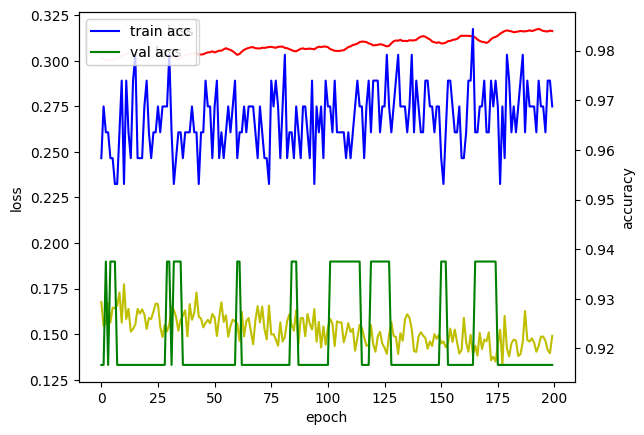

In [143]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [125]:
y_pred_DNN

array([[0.9671288 ],
       [0.9093617 ],
       [0.88915336],
       [0.9781719 ],
       [0.92478245],
       [0.9648278 ],
       [0.9499212 ],
       [0.93160933],
       [0.82200867],
       [0.9535643 ],
       [0.96277136],
       [0.93663085],
       [0.97457457],
       [0.9584045 ],
       [0.9397287 ],
       [0.9662946 ],
       [0.92500347],
       [0.9438347 ],
       [0.91505754],
       [0.91218513],
       [0.87082183],
       [0.94422174],
       [0.87743104],
       [0.8895345 ],
       [0.83697414],
       [0.90580595],
       [0.90372455],
       [0.9206807 ],
       [0.984931  ],
       [0.96837944],
       [0.9539262 ],
       [0.9479313 ],
       [0.9593047 ],
       [0.9744891 ],
       [0.9764759 ],
       [0.9277728 ],
       [0.971278  ],
       [0.9871829 ],
       [0.9187337 ],
       [0.9610525 ],
       [0.96371794],
       [0.8497467 ],
       [0.9129365 ],
       [0.9872606 ],
       [0.89245224],
       [0.95808697],
       [0.9590974 ],
       [0.965

# 병원 정보 api 불러오기

In [ ]:
serviceKey = "repbMvjCXw96iTs6wjKM3Htm1H480VcdawruKmikMmOYZF8aVD/rJDkfGoyLeTuS5Y1KEOzUrwwPIu87UQ9LbQ=="
serviceKeyDecoded = parse.unquote(serviceKey, 'UTF-8')

url = "http://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList"
returnType="xml"
Pindex = 1
Psize = 1000


queryParams = '?' + parse.urlencode({ parse.quote_plus("serviceKey") : serviceKeyDecoded,
                                parse.quote_plus("numOfRows") : '10000',
                                parse.quote_plus("pageNo") : '2'
                                    })

res = requests.get(url + queryParams)

In [ ]:
soup = BeautifulSoup(res.text, 'lxml-xml')
items = soup.find_all("item")

In [ ]:
pprint.pprint(items)

In [ ]:
len(items)

In [ ]:
def parse():
    try:
        ADDR = item.find("addr").get_text()
        CLCD = item.find("clCd").get_text()
        CLCDNM = item.find("clCdNm").get_text()
        EMDONGNM = item.find("emdongNm").get_text()
        ESTBDB = item.find("estbDd").get_text()
        POSTNO = item.find("postNo").get_text()
        SGGUCD = item.find("sgguCd").get_text()
        SGGUCDNM = item.find("sgguCdNm").get_text()
        SIDOCD = item.find("sidoCd").get_text()
        SIDOCDNM = item.find("sidoCdNm").get_text()
        XPOS = item.find("XPos").get_text()
        YPOS = item.find("YPos").get_text()
        YADMNM = item.find("yadmNm").get_text()
        YKIHO = item.find("ykiho").get_text()
        return {
            "주소":ADDR,
            "종별코드":CLCD,
            "종별코드명":CLCDNM,
            "읍면동":EMDONGNM,
            "개설일자":ESTBDB,
            "Post No.":POSTNO,
            "시군구코드":SGGUCD,
            "시군구코드명":SGGUCDNM,
            "시도코드":SIDOCD,
            "시도코드명":SIDOCDNM,
            "x좌표":XPOS,
            'y좌표':YPOS,
            "요양기관명":YADMNM,
            "암호화요양기호":YKIHO
        }
    except AttributeError as e:
        return {
            "주소":None,
            "종별코드":None,
            "종별코드명":None,
            "읍면동":None,
            "개설일자":None,
            "Post No.":None,
            "시군구코드":None,
            "시군구코드명":None,
            "시도코드":None,
            "시도코드명":None,
            "x좌표":None,
            'y좌표':None,
            "요양기관명":None,
            "암호화요양기호":None
        }

In [ ]:
row = list()

for item in items : 
    row.append(parse())

In [ ]:
df_api = pd.DataFrame(row)
df_api.head()

In [ ]:
df_api.shape[0] - df_api.count()

In [ ]:
df_api.dropna(axis=0, how="any", inplace=True)
df_api.shape

In [ ]:
df_api.to_csv(dirShare+"/data/병원정보api_day2.csv",sep=',', encoding="utf-8")

In [ ]:
# 17년도 당기순이익 히스토그램
sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="profit1", Range=12)

In [ ]:
#17년도 당기순이익 박스플롯
sp_boxplot(DF=df_join_clst, colClst="NumberOfCluster", colbox="profit1", Range=10)

In [ ]:
# test_df[test_df["1"].notnull()]

In [ ]:
# 16년도 당기순이익
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="profit2")

In [ ]:
# 17년도 이익 잉여금
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="surplus1")

In [ ]:
# 16년도 이익 잉여금
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="surplus2")

In [ ]:
# 17년도 직원수
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="employee1")

In [ ]:
# 16년도 직원수
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="employee2")